# Equal-Weight S&P 500 Index Fund

## Introduction & Library Imports

The S&P 500 is the world's most popular stock market index. The largest fund that is benchmarked to this index is the SPDR® S&P 500® ETF Trust. It has more than US$250 billion of assets under management.

The goal of this section of the course is to create a Python script that will accept the value of your portfolio and tell you how many shares of each S&P 500 constituent you should purchase to get an equal-weight version of the index fund.

## Library Imports

The first thing we need to do is import the open-source software libraries that we'll be using in this tutorial.

In [25]:
import numpy as np #The Numpy numerical computing library
import pandas as pd #The Pandas data science library
import requests #The requests library for HTTP requests in Python
import xlsxwriter #The XlsxWriter libarary for 
import math #The Python math module
from contextlib import suppress
import matplotlib.pyplot as plt

## Importing Our List of Stocks

The next thing we need to do is import the constituents of the S&P 500.

These constituents change over time, so in an ideal world you would connect directly to the index provider (Standard & Poor's) and pull their real-time constituents on a regular basis.
306
Paying for access to the index provider's API is outside of the scope of this course. 

There's a static version of the S&P 500 constituents available here.  Move this file into the `starter-files` folder so it can be accessed by other files in that directory.

Now it's time to import these stocks to our Jupyter Notebook file.

In [26]:
#url='https://github.com/prashantmalan/algorthmic_trading/blob/main/sp_500_stocks.csv?raw=true'
stocks = pd.read_csv(r'C:\Users\user\Downloads\sp_500_stocks.csv')
print (stocks)
type(stocks)
stocks['Ticker']


    Ticker
0        A
1      AAL
2      AAP
3     AAPL
4     ABBV
..     ...
496    YUM
497    ZBH
498   ZBRA
499   ZION
500    ZTS

[501 rows x 1 columns]


0         A
1       AAL
2       AAP
3      AAPL
4      ABBV
       ... 
496     YUM
497     ZBH
498    ZBRA
499    ZION
500     ZTS
Name: Ticker, Length: 501, dtype: object

## Acquiring an API Token

Now it's time to import our IEX Cloud API token. This is the data provider that we will be using throughout this course.

API tokens (and other sensitive information) should be stored in a `secrets.py` file that doesn't get pushed to your local Git repository. We'll be using a sandbox API token in this course, which means that the data we'll use is randomly-generated and (more importantly) has no cost associated with it.

[Click here](http://nickmccullum.com/algorithmic-trading-python/secrets.py) to download your `secrets.py` file. Move the file into the same directory as this Jupyter Notebook before proceeding.

In [18]:
from secrets import IEX_CLOUD_API_TOKEN

## Making Our First API Call

Now it's time to structure our API calls to IEX cloud. 

We need the following information from the API:

* Market capitalization for each stock
* Price of each stock



In [27]:
symbol='AMZN'
print(IEX_CLOUD_API_TOKEN)
##IEX_CLOUD_API_TOKEN="059b97af715d417d9f49f50b51b1c448"
api_url = f'https://sandbox.iexapis.com/stable/stock/{symbol}/quote?token={IEX_CLOUD_API_TOKEN}'
data = requests.get(api_url).json()
data

Tpk_059b97af715d417d9f49f50b51b1c448


{'avgTotalVolume': 66457844,
 'calculationPrice': 'close',
 'change': 4.98,
 'changePercent': 0.037,
 'close': 148.5,
 'closeSource': 'ciffaoli',
 'closeTime': 1691923682011,
 'companyName': 'Amazon.com Inc.',
 'currency': 'USD',
 'delayedPrice': 146.32,
 'delayedPriceTime': 1669594263210,
 'extendedChange': -0.01,
 'extendedChangePercent': -7e-05,
 'extendedPrice': 148.83,
 'extendedPriceTime': 1694111769365,
 'high': 149.58,
 'highSource': 'uinyder1e eepidl5ca t m',
 'highTime': 1682824459462,
 'iexAskPrice': 0,
 'iexAskSize': 0,
 'iexBidPrice': 0,
 'iexBidSize': 0,
 'iexClose': 142.77,
 'iexCloseTime': 1722439716859,
 'iexLastUpdated': 1666845480835,
 'iexMarketPercent': 0.02184789163695241,
 'iexOpen': 147.137,
 'iexOpenTime': 1715523300555,
 'iexRealtimePrice': 148.98,
 'iexRealtimeSize': 208,
 'iexVolume': 1219706,
 'lastTradeTime': 1718181414878,
 'latestPrice': 144.78,
 'latestSource': 'Close',
 'latestTime': 'August 10, 2022',
 'latestUpdate': 1665221243354,
 'latestVolume': 5

## Parsing Our API Call

The API call that we executed in the last code block contains all of the information required to build our equal-weight S&P 500 strategy. 

With that said, the data isn't in a proper format yet. We need to parse it first.

In [28]:
print(data['latestPrice'])
print(data['marketCap'])

144.78
1507019399029


## Adding Our Stocks Data to a Pandas DataFrame

The next thing we need to do is add our stock's price and market capitalization to a pandas DataFrame. Think of a DataFrame like the Python version of a spreadsheet. It stores tabular data.

In [29]:
my_columns = ['Ticker', 'Price','Market Capitalization', 'Number Of Shares to Buy']
sp_dataframe = pd.DataFrame(columns = my_columns)
sp_dataframe

,Ticker,Price,Market Capitalization,Number Of Shares to Buy


In [30]:

sp_dataframe = sp_dataframe.append(
                                        pd.Series(['AMZN', 
                                                   data['latestPrice'], 
                                                   data['marketCap'], 
                                                   'N/A'], 
                                                  index = my_columns), 
                                        ignore_index = True)
sp_dataframe

,Ticker,Price,Market Capitalization,Number Of Shares to Buy
0,AMZN,144.78,1507019399029,N/A


## Looping Through The Tickers in Our List of Stocks

Using the same logic that we outlined above, we can pull data for all S&P 500 stocks and store their data in the DataFrame using a `for` loop.

In [31]:
sp_dataframe = pd.DataFrame(columns = my_columns)
print(stocks)
for symbol in stocks['Ticker']:
    api_url = f'https://sandbox.iexapis.com/stable/stock/{symbol}/quote?token={IEX_CLOUD_API_TOKEN}'
    print(api_url)
    data = requests.get(api_url).json()
    print(data)
    sp_dataframe = sp_dataframe.append(
                                        pd.Series([symbol, 
                                                   data['latestPrice'], 
                                                   data['marketCap'], 
                                                   'N/A'], 
                                                  index = my_columns), 
                                        ignore_index = True)
    print(sp_dataframe)
    


    Ticker
0        A
1      AAL
2      AAP
3     AAPL
4     ABBV
..     ...
496    YUM
497    ZBH
498   ZBRA
499   ZION
500    ZTS

[501 rows x 1 columns]
https://sandbox.iexapis.com/stable/stock/A/quote?token=Tpk_059b97af715d417d9f49f50b51b1c448
{'avgTotalVolume': 1343584, 'calculationPrice': 'close', 'change': 3.8, 'changePercent': 0.02992, 'close': 136.07, 'closeSource': 'flfioaci', 'closeTime': 1736874028816, 'companyName': 'Agilent Technologies Inc.', 'currency': 'USD', 'delayedPrice': 137.14, 'delayedPriceTime': 1680160366233, 'extendedChange': -0.29, 'extendedChangePercent': -0.00215, 'extendedPrice': 136.9, 'extendedPriceTime': 1691381537127, 'high': 138.11, 'highSource': ' nde5p di1 etramcylieeu', 'highTime': 1682642439178, 'iexAskPrice': 0, 'iexAskSize': 0, 'iexBidPrice': 0, 'iexBidSize': 0, 'iexClose': 136.79, 'iexCloseTime': 1663000219872, 'iexLastUpdated': 1724948671084, 'iexMarketPercent': 0.06948167466686514, 'iexOpen': 137.18, 'iexOpenTime': 1681180442480, 'iexRealtime

KeyboardInterrupt: 

In [ ]:
sp_dataframe

## Using Batch API Calls to Improve Performance

Batch API calls are one of the easiest ways to improve the performance of your code.

This is because HTTP requests are typically one of the slowest components of a script.

Also, API providers will often give you discounted rates for using batch API calls since they are easier for the API provider to respond to.

IEX Cloud limits their batch API calls to 100 tickers per request. Still, this reduces the number of API calls we'll make in this section from 500 to 5 - huge improvement! In this section, we'll split our list of stocks into groups of 100 and then make a batch API call for each group.

In [ ]:
# Function sourced from 
# https://stackoverflow.com/questions/312443/how-do-you-split-a-list-into-evenly-sized-chunks
def chunks(lst, n):
    """Yield successive n-sized chunks from lst."""
    for i in range(0, len(lst), n):
        yield lst[i:i + n]

In [32]:
symbol_groups = list(chunks(stocks['Ticker'], 100))
symbol_strings = []
for i in range(0, len(symbol_groups)):
    symbol_strings.append(','.join(symbol_groups[i]))
    print(symbol_strings[i])

sp_dataframe = pd.DataFrame(columns = my_columns)

for symbol_string in symbol_strings:
#     print(symbol_strings)
        batch_api_call_url = f'https://sandbox.iexapis.com/stable/stock/market/batch/?types=quote&symbols={symbol_string}&token={IEX_CLOUD_API_TOKEN}'
        data = requests.get(batch_api_call_url).json()
        print (data.get(BaseException))

        for symbol in symbol_string.split(','):
            sp_dataframe = sp_dataframe.append(
                                            pd.Series([symbol, 
                                                       data[symbol]['quote']['latestPrice'], 
                                                       data[symbol]['quote']['marketCap'], 
                                                       'N/A'], 
                                                      index = my_columns), 
                                            ignore_index = True)


    
sp_dataframe



A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,ADI,ADM,ADP,ADSK,AEE,AEP,AES,AFL,AIG,AIV,AIZ,AJG,AKAM,ALB,ALGN,ALK,ALL,ALLE,ALXN,AMAT,AMCR,AMD,AME,AMGN,AMP,AMT,AMZN,ANET,ANSS,ANTM,AON,AOS,APA,APD,APH,APTV,ARE,ATO,ATVI,AVB,AVGO,AVY,AWK,AXP,AZO,BA,BAC,BAX,BBY,BDX,BEN,BF.B,BIIB,BIO,BK,BKNG,BKR,BLK,BLL,BMY,BR,BRK.B,BSX,BWA,BXP,C,CAG,CAH,CARR,CAT,CB,CBOE,CBRE,CCI,CCL,CDNS,CDW,CE,CERN,CF,CFG,CHD,CHRW,CHTR,CI,CINF,CL,CLX,CMA,CMCSA
CME,CMG,CMI,CMS,CNC,CNP,COF,COG,COO,COP,COST,COTY,CPB,CPRT,CRM,CSCO,CSX,CTAS,CTL,CTSH,CTVA,CTXS,CVS,CVX,CXO,D,DAL,DD,DE,DFS,DG,DGX,DHI,DHR,DIS,DISCK,DISH,DLR,DLTR,DOV,DOW,DPZ,DRE,DRI,DTE,DUK,DVA,DVN,DXC,DXCM,EA,EBAY,ECL,ED,EFX,EIX,EL,EMN,EMR,EOG,EQIX,EQR,ES,ESS,ETFC,ETN,ETR,EVRG,EW,EXC,EXPD,EXPE,EXR,F,FANG,FAST,FB,FBHS,FCX,FDX,FE,FFIV,FIS,FISV,FITB,FLIR,FLS,FLT,FMC,FOX,FOXA,FRC,FRT,FTI,FTNT,FTV,GD,GE,GILD,GIS
GL,GLW,GM,GOOG,GOOGL,GPC,GPN,GPS,GRMN,GS,GWW,HAL,HAS,HBAN,HBI,HCA,HD,HES,HIG,HII,HLT,HOLX,HON,HPE,HPQ,HRB,HRL,HSIC,HST,HSY,HUM,HWM,IBM,ICE,IDXX,IEX,IFF,ILMN,INCY,INF

,Ticker,Price,Market Capitalization,Number Of Shares to Buy
0,A,137.70,41008767693,N/A
1,AAL,15.42,10262433050,N/A
2,AAP,202.47,12074237786,N/A
3,AAPL,172.16,2758693086388,N/A
4,ABBV,145.74,261291126123,N/A
...,...,...,...,...
496,YUM,123.37,34835005431,N/A
497,ZBH,116.10,25037656588,N/A
498,ZBRA,344.24,17510764624,N/A
499,ZION,58.24,8858413160,N/A


## Calculating the Number of Shares to Buy

As you can see in the DataFrame above, we stil haven't calculated the number of shares of each stock to buy.

We'll do that next.

In [33]:
portfolio_size = input("Enter the value of your portfolio:")

try:
    val = float(portfolio_size)
except ValueError:
    print("That's not a number! \n Try again:")
    portfolio_size = input("Enter the value of your portfolio:")

Enter the value of your portfolio:1000000


In [34]:
position_size = float(portfolio_size) / len(sp_dataframe.index)
print(len(sp_dataframe.index))
print(position_size)
for i in range(0, len(sp_dataframe['Ticker'])):
    sp_dataframe.loc[i, 'Number Of Shares to Buy'] = math.floor(position_size / sp_dataframe['Price'][i])
sp_dataframe

501
1996.007984031936


,Ticker,Price,Market Capitalization,Number Of Shares to Buy
0,A,137.70,41008767693,14
1,AAL,15.42,10262433050,129
2,AAP,202.47,12074237786,9
3,AAPL,172.16,2758693086388,11
4,ABBV,145.74,261291126123,13
...,...,...,...,...
496,YUM,123.37,34835005431,16
497,ZBH,116.10,25037656588,17
498,ZBRA,344.24,17510764624,5
499,ZION,58.24,8858413160,34


In [36]:
import seaborn as sns
sp_dataFrame_graph=pd.DataFrame()
sp_dataFrame_graph['ticker']=sp_dataframe["Ticker"]
sp_dataFrame_graph['mar_cap']=sp_dataframe["Market Capitalization"].astype(float)/100
sp_dataFrame_graph['nb_shares']=sp_dataframe["Number Of Shares to Buy"].astype(int)



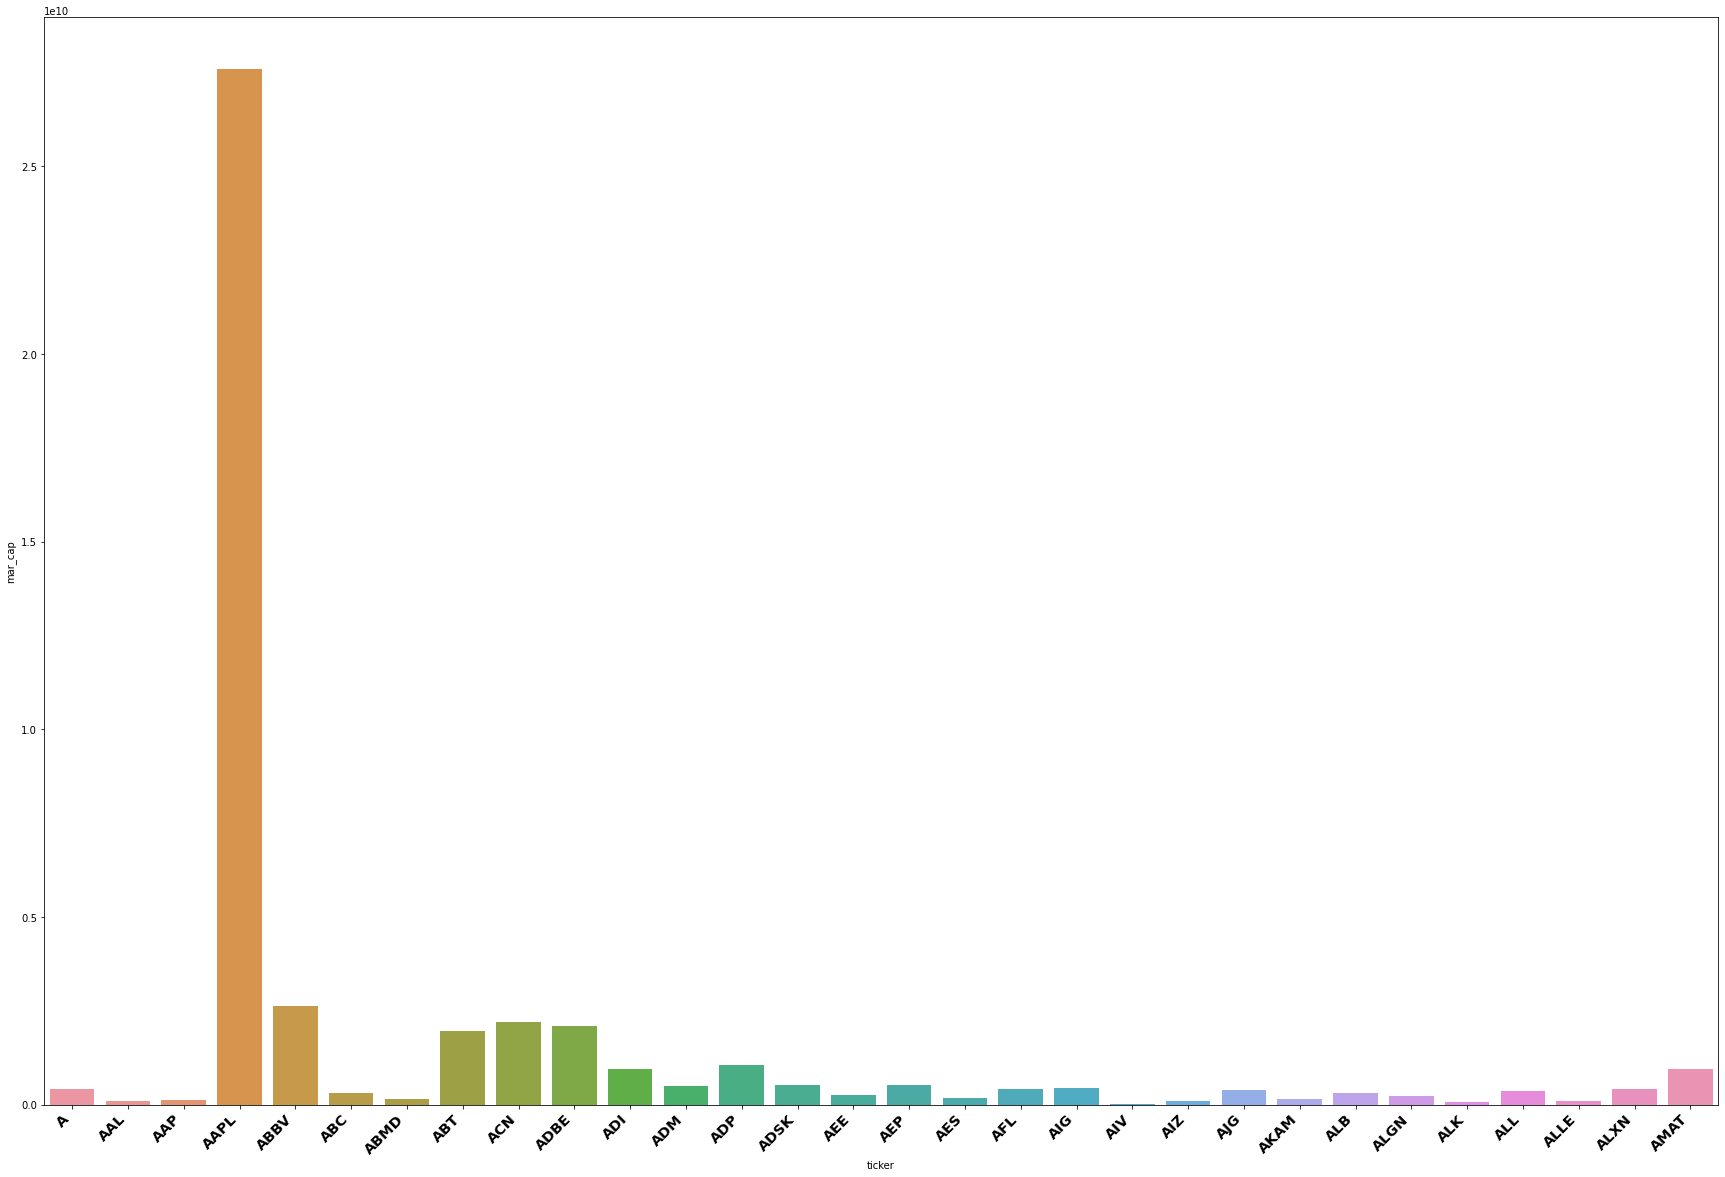

In [37]:
#first 30 tickers
plt.figure(figsize=(30,20))
ax = sns.barplot(x="ticker",y=sp_dataFrame_graph["mar_cap"],
               data=sp_dataFrame_graph.head(30))
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right',
    fontweight='bold',
    fontsize='x-large')
plt.show()



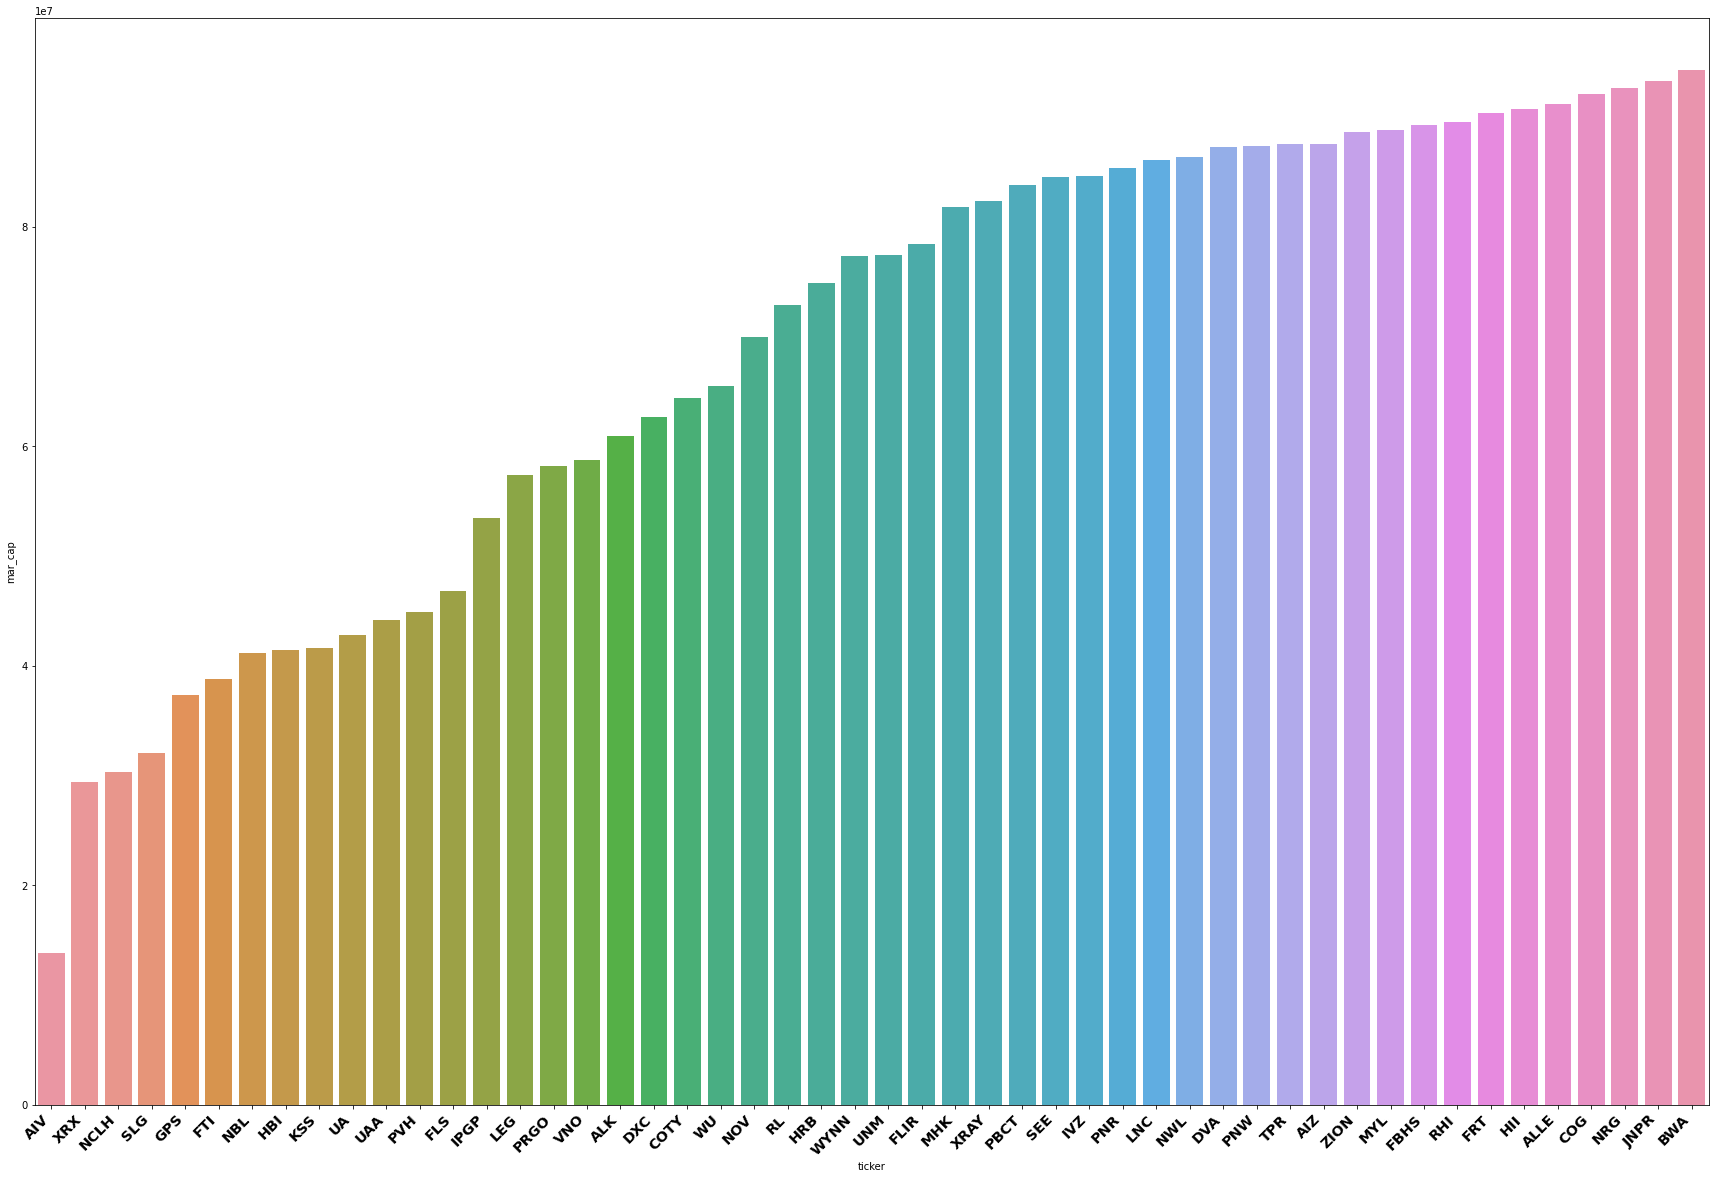

In [38]:
# sortted values by market cap
plt.figure(figsize=(30,20))
ax = sns.barplot(x="ticker",y=sp_dataFrame_graph["mar_cap"].astype(float),
              data=sp_dataFrame_graph.sort_values(by="mar_cap").head(50))
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right',
    fontweight='bold',
    fontsize='x-large')
plt.show()

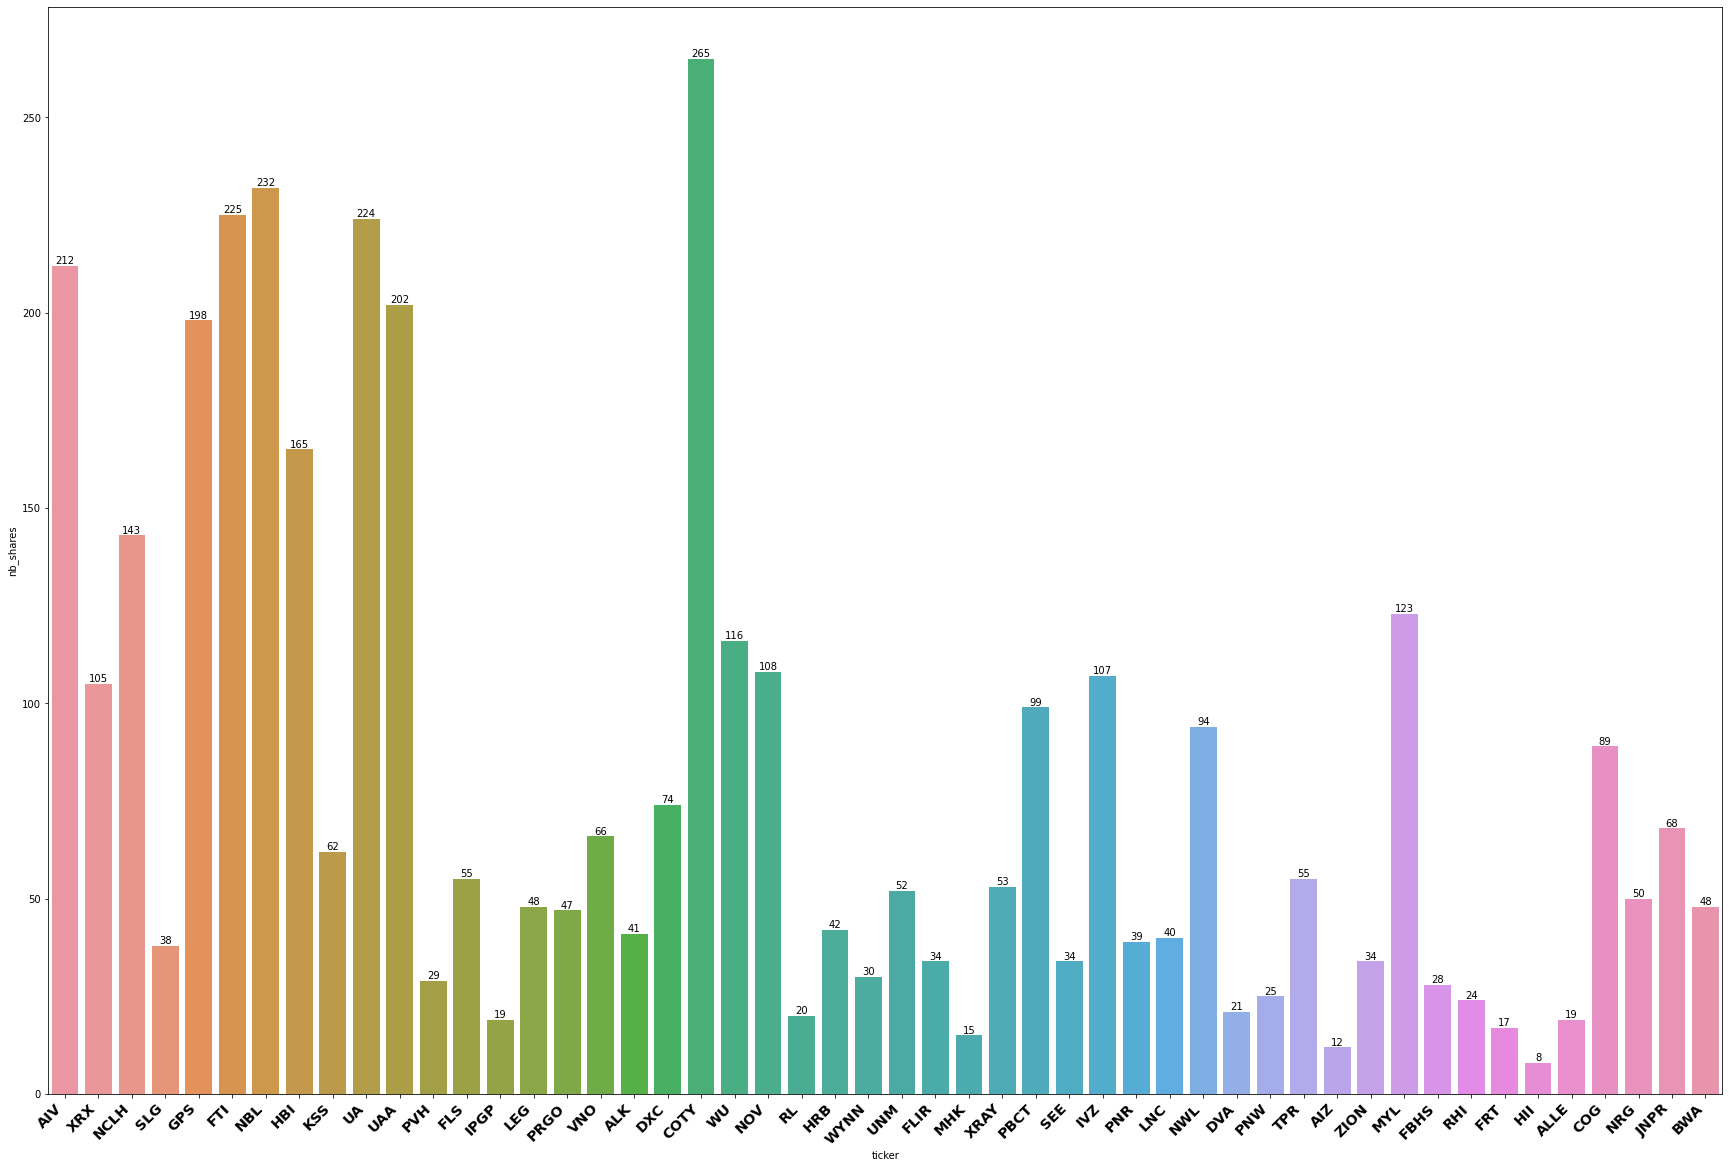

In [39]:
# nb_shares
plt.figure(figsize=(30,20))
ax = sns.barplot(x="ticker",y=sp_dataFrame_graph["nb_shares"].astype(float),
                 data=sp_dataFrame_graph.sort_values(by="mar_cap").head(50))


ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right',
    fontweight='bold',
    fontsize='x-large')
for i in ax.containers:
    ax.bar_label(i,)
    

## Formatting Our Excel Output

We will be using the XlsxWriter library for Python to create nicely-formatted Excel files.

XlsxWriter is an excellent package and offers tons of customization. However, the tradeoff for this is that the library can seem very complicated to new users. Accordingly, this section will be fairly long because I want to do a good job of explaining how XlsxWriter works.

### Initializing our XlsxWriter Object

In [40]:
writer = pd.ExcelWriter(r'C:\Users\user\Downloads\recommended_trades.xlsx', engine='xlsxwriter')
sp_dataframe.to_excel(writer, sheet_name='Recommended Trades', index = False)

### Creating the Formats We'll Need For Our `.xlsx` File

Formats include colors, fonts, and also symbols like `%` and `$`. We'll need four main formats for our Excel document:
* String format for tickers
* \\$XX.XX format for stock prices
* \\$XX,XXX format for market capitalization
* Integer format for the number of shares to purchase

In [41]:
background_color = '#0a0a23'
font_color = '#ffffff'

string_format = writer.book.add_format(
        {
            'font_color': font_color,
            'bg_color': background_color,
            'border': 1
        }
    )

dollar_format = writer.book.add_format(
        {
            'num_format':'$0.00',
            'font_color': font_color,
            'bg_color': background_color,
            'border': 1
        }
    )

integer_format = writer.book.add_format(
        {
            'num_format':'0',
            'font_color': font_color,
            'bg_color': background_color,
            'border': 1
        }
    )

### Applying the Formats to the Columns of Our `.xlsx` File

We can use the `set_column` method applied to the `writer.sheets['Recommended Trades']` object to apply formats to specific columns of our spreadsheets.

Here's an example:

```python
writer.sheets['Recommended Trades'].set_column('B:B', #This tells the method to apply the format to column B
                     18, #This tells the method to apply a column width of 18 pixels
                     string_format #This applies the format 'string_format' to the column
                    )
```

In [42]:
# writer.sheets['Recommended Trades'].write('A1', 'Ticker', string_format)
# writer.sheets['Recommended Trades'].write('B1', 'Price', string_format)
# writer.sheets['Recommended Trades'].write('C1', 'Market Capitalization', string_format)
# writer.sheets['Recommended Trades'].write('D1', 'Number Of Shares to Buy', string_format)
# writer.sheets['Recommended Trades'].set_column('A:A', 20, string_format)
# writer.sheets['Recommended Trades'].set_column('B:B', 20, dollar_format)
# writer.sheets['Recommended Trades'].set_column('C:C', 20, dollar_format)
# writer.sheets['Recommended Trades'].set_column('D:D', 20, integer_format)


This code works, but it violates the software principle of "Don't Repeat Yourself". 

Let's simplify this by putting it in 2 loops:

In [43]:
column_formats = { 
                    'A': ['Ticker', string_format],
                    'B': ['Price', dollar_format],
                    'C': ['Market Capitalization', dollar_format],
                    'D': ['Number of Shares to Buy', integer_format]
                    }

for column in column_formats.keys():
    writer.sheets['Recommended Trades'].set_column(f'{column}:{column}', 20, column_formats[column][1])
    writer.sheets['Recommended Trades'].write(f'{column}1', column_formats[column][0], string_format)

## Saving Our Excel Output

Saving our Excel file is very easy:

In [44]:
writer.save()

In [ ]:
import os
current_path = os.getcwd()
print(current_path)

In [ ]:
nbconvert --to webpdf --allow-chromium-download SP_500_Equal_Weight.ipynb